# Speed

In [1]:
import pyecharts.options as opts
from pyecharts.charts import Line,Boxplot
import pandas as pd
import numpy as np

                 1
count  5034.000000
mean     57.525314
std     167.679935
min       0.000000
25%       0.000000
50%       8.940000
75%      54.260000
max    6045.550000


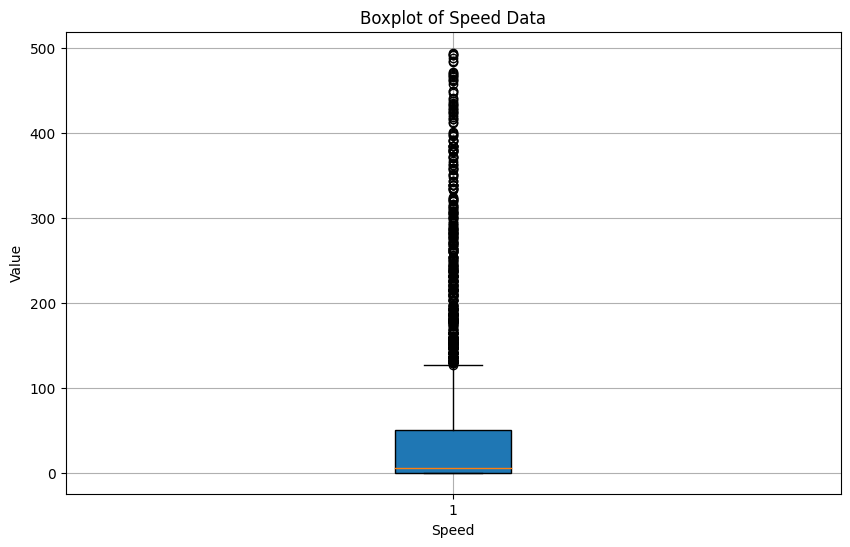

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv("speed_95d.csv", sep=',', header=None, usecols=[1])
print(data.describe())

data = np.array(data).reshape(-1)
data = [x for x in data if x <500]


plt.figure(figsize=(10, 6))  # 设置图形大小
plt.boxplot(data, vert=True, patch_artist=True)  # vert=True表示箱型图是垂直的，patch_artist=True填充颜色
plt.title('Boxplot of Speed Data')  # 设置标题
plt.xlabel('Speed')  # 设置x轴标签
plt.ylabel('Value')  # 设置y轴标签
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形


In [24]:
data = pd.read_csv("speed_95d.csv", sep=',', header=None, usecols=[1])
data.head(5)

print(data.describe())

# 计算四分位数和IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# 定义异常值的范围
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# 找出异常值
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(outliers)

data = np.array(data).reshape(-1)

                 1
count  5034.000000
mean     57.525314
std     167.679935
min       0.000000
25%       0.000000
50%       8.940000
75%      54.260000
max    6045.550000
Q1: 1    0.0
Name: 0.25, dtype: float64
Q3: 1    54.26
Name: 0.75, dtype: float64
IQR: 1    54.26
dtype: float64
Lower bound: 1   -81.39
dtype: float64
Upper bound: 1    135.65
dtype: float64
           1
0        NaN
1        NaN
2        NaN
3        NaN
4     153.88
...      ...
5029     NaN
5030     NaN
5031     NaN
5032     NaN
5033     NaN

[5034 rows x 1 columns]


In [16]:
c = (
    Line()
    .add_xaxis(xaxis_data=list(range(len(data))))  # 添加x轴数据
    .add_yaxis(
        series_name="Speed",
        y_axis=data,
        is_smooth=True,  # 是否平滑显示线条
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),  # 数据区域缩进样式
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Line-smooth"),  # 设置标题
        legend_opts=opts.LegendOpts(pos_top="top"),  # 设置图例位置
        xaxis_opts=opts.AxisOpts(name="Index", axislabel_opts=opts.LabelOpts(rotate=45)),  # 设置X轴标签和旋转角度
        yaxis_opts=opts.AxisOpts(name="Speed (cm/s)"),  # 设置Y轴标签

        datazoom_opts=[opts.DataZoomOpts()],  # 添加数据缩放组件
        toolbox_opts = opts.ToolboxOpts(is_show=True),  #显示工具箱
        visualmap_opts = opts.VisualMapOpts(is_show=True),  #显示视觉映射组件
        tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="cross"),  # 提示框
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),  # 不显示数据点的文本标签
    )
    # .render("./Mesh/HTML/UWB-speed.html")  # 渲染图表并保存为HTML文件
)

In [30]:
c.render_notebook()